In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
pollution_meteo = pd.read_csv("output/pollution_meteo_clean.csv")
pollution_meteo["timestamp"] = pd.to_datetime(pollution_meteo["timestamp"])

pollution_meteo.info()
pollution_meteo.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027828 entries, 0 to 1027827
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   station_id         1027828 non-null  object        
 1   timestamp          1027828 non-null  datetime64[ns]
 2   pollutant          1027828 non-null  object        
 3   value              1027828 non-null  float64       
 4   unit               1027828 non-null  object        
 5   station_name       1027828 non-null  object        
 6   city               1027828 non-null  object        
 7   lat                1027828 non-null  float64       
 8   lon                1027828 non-null  float64       
 9   station_type       1027828 non-null  object        
 10  temperature_c      907309 non-null   float64       
 11  humidity_pct       907309 non-null   float64       
 12  wind_speed_kmh     907309 non-null   float64       
 13  precipitation_mm   907309 n

,station_id,timestamp,pollutant,value,unit,station_name,city,lat,lon,station_type,temperature_c,humidity_pct,wind_speed_kmh,precipitation_mm,weather_condition
0,ST0001,2024-01-01 00:00:00,O3,88.30,ug/m3,Paris-urbaine-1,Paris,48.809101,2.329703,urbaine,2.8,57.4,49.4,0.8,pluvieux
1,ST0001,2024-01-01 02:00:00,PM10,47.08,ug/m3,Paris-urbaine-1,Paris,48.809101,2.329703,urbaine,-0.9,45.4,42.3,0.0,pluvieux
2,ST0001,2024-01-01 05:00:00,CO,0.48,mg/m3,Paris-urbaine-1,Paris,48.809101,2.329703,urbaine,NaN,NaN,NaN,NaN,NaN
3,ST0001,2024-01-01 07:00:00,CO,0.90,mg/m3,Paris-urbaine-1,Paris,48.809101,2.329703,urbaine,10.6,94.1,15.8,0.0,nuageux
4,ST0001,2024-01-01 08:00:00,CO,1.58,mg/m3,Paris-urbaine-1,Paris,48.809101,2.329703,urbaine,6.6,73.7,18.7,3.5,pluvieux


In [54]:
print(pollution_meteo["timestamp"].min())
print(pollution_meteo["timestamp"].max())

2024-01-01 00:00:00
2024-06-30 23:00:00


C:\Users\Administrateur\AppData\Local\Temp\ipykernel_28516\736306684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm25["date"] = df_pm25["timestamp"].dt.date
C:\Users\Administrateur\AppData\Local\Temp\ipykernel_28516\736306684.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm10["date"] = df_pm10["timestamp"].dt.date


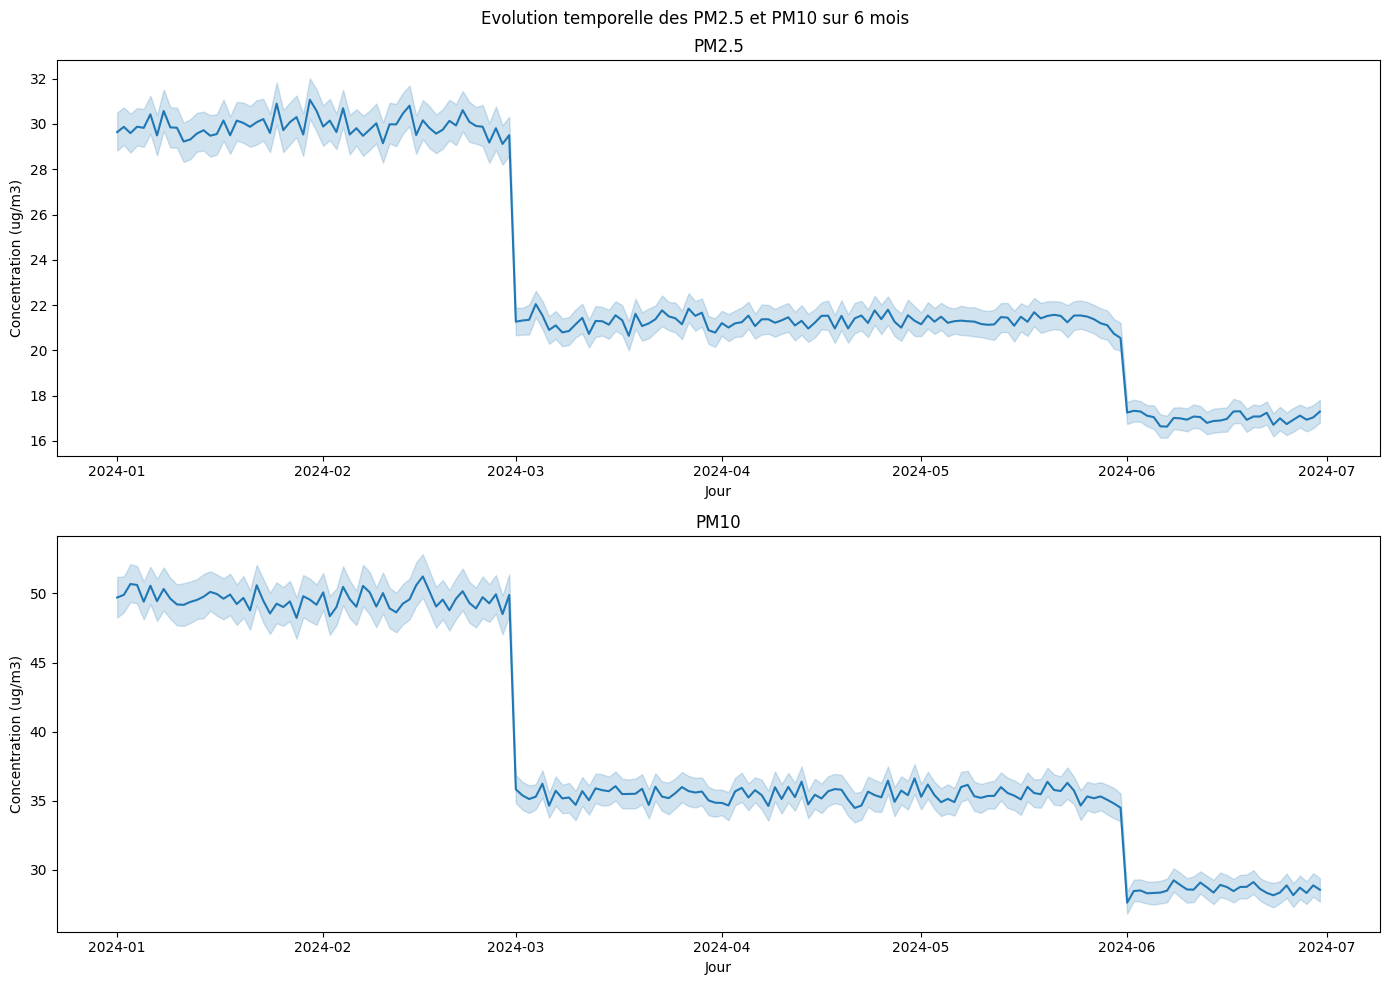

In [55]:
# Evolution temporelle des PM2.5 et PM10 sur 6 mois (line plot).
df_pm25 = pollution_meteo[pollution_meteo["pollutant"] == "PM2.5"]
df_pm25["date"] = df_pm25["timestamp"].dt.date

df_pm10 = pollution_meteo[pollution_meteo["pollutant"] == "PM10"]
df_pm10["date"] = df_pm10["timestamp"].dt.date

fig, axes = plt.subplots(2,1,figsize=(14,10))
fig.suptitle("Evolution temporelle des PM2.5 et PM10 sur 6 mois")
sns.lineplot(df_pm25, x="date", y="value", ax=axes[0])
axes[0].set_title("PM2.5")
axes[0].set_xlabel("Jour")
axes[0].set
axes[0].set_ylabel("Concentration (ug/m3)")
sns.lineplot(df_pm10, x="date", y="value", ax=axes[1])
axes[1].set_title("PM10")
axes[1].set_xlabel("Jour")
axes[1].set_ylabel("Concentration (ug/m3)")
plt.tight_layout()

plt.savefig("C:/Users/Administrateur/Documents/M2i_CDSD_TDTP/spark/TP_Analyse_Qualite_Air/output/figures/lineplot.png")

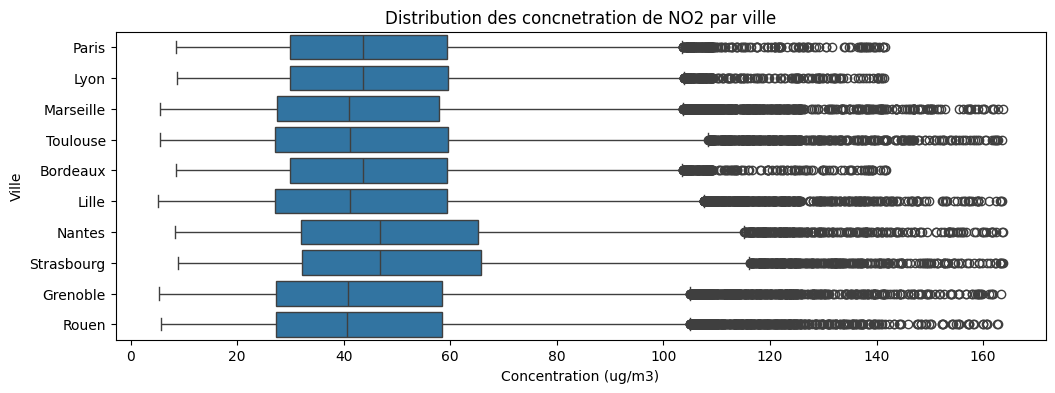

In [56]:
# Distribution des concentrations de NO2 par ville (boxplot).
plt.figure(figsize=(12,4))
sns.boxplot(pollution_meteo[pollution_meteo["pollutant"] == "NO2"], x="value", y="city")
plt.title("Distribution des concnetration de NO2 par ville")
plt.xlabel("Concentration (ug/m3)")
plt.ylabel("Ville")

plt.savefig("C:/Users/Administrateur/Documents/M2i_CDSD_TDTP/spark/TP_Analyse_Qualite_Air/output/figures/boxplot.png")

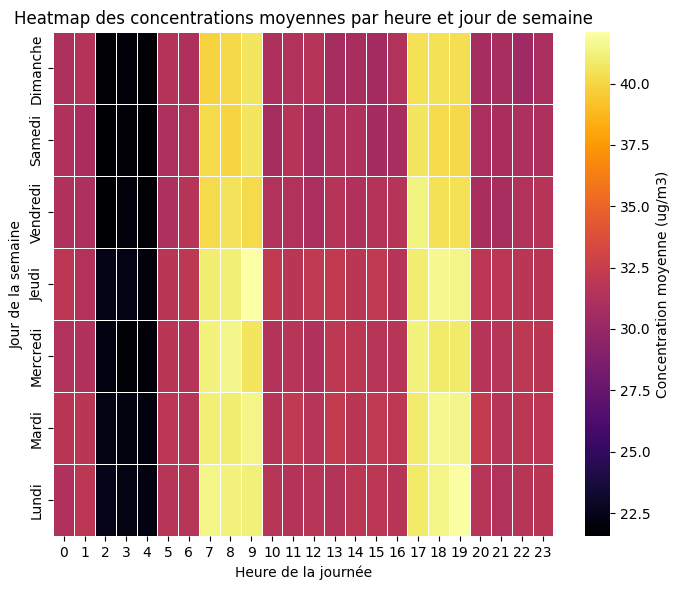

In [ ]:
# Heatmap des concentrations moyennes par heure et jour de semaine.
df_heatmap = pollution_meteo.copy()
df_heatmap["hour"] = df_heatmap["timestamp"].dt.hour
df_heatmap["day_of_week"] = df_heatmap["timestamp"].dt.day_of_week
df_heatmap_pivot = (
    df_heatmap
    .groupby(['day_of_week', 'hour'])['value']
    .mean()
    .reset_index()
    .pivot(index='day_of_week', columns='hour', values='value')
    .sort_index(ascending=False)
)

plt.figure(figsize=(7,6))
plt.title("Heatmap des concentrations moyennes par heure et jour de semaine")
sns.heatmap(
    df_heatmap_pivot,
    cmap="inferno",
    linewidths=0.5,
    cbar_kws={'label': 'Concentration moyenne (ug/m3)'},
)
plt.xlabel("Heure de la journée")
plt.yticks(np.arange(7) + 0.5 * np.ones(7), labels=reversed(["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"]))
plt.ylabel("Jour de la semaine")
plt.tight_layout()

plt.savefig("C:/Users/Administrateur/Documents/M2i_CDSD_TDTP/spark/TP_Analyse_Qualite_Air/output/figures/heatmap.png")

# => Quelque soit le jour de la semaine, la concentration de polluants est forte entre 7h et 9h et entre 17h et 19h.

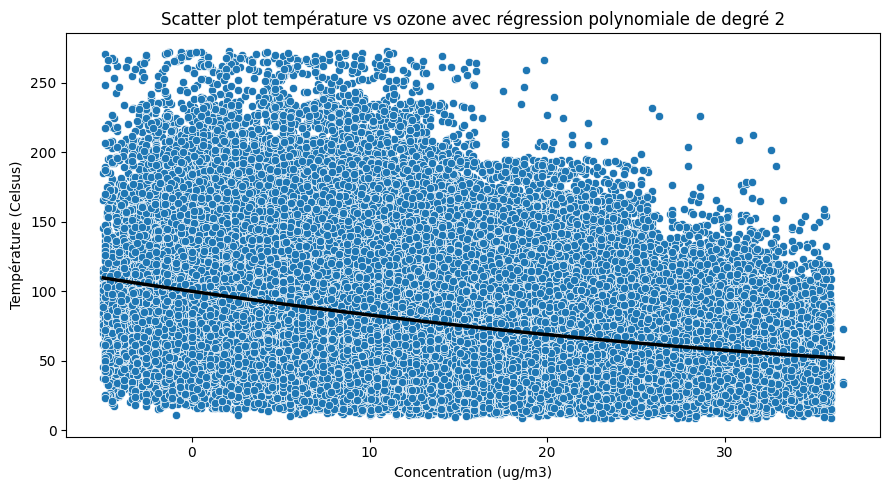

In [58]:
# Scatter plot température vs ozone avec régression.
df_O3 = pollution_meteo[(pollution_meteo["pollutant"] == "O3") & (pollution_meteo["temperature_c"] > -10) & (pollution_meteo["temperature_c"] < 40)]
# df_O3 = pollution_meteo[pollution_meteo["pollutant"] == "O3"]

plt.figure(figsize=(9,5))
sns.scatterplot(df_O3, x="temperature_c", y="value")
plt.title("Scatter plot température vs ozone avec régression polynomiale de degré 2")
plt.xlabel("Concentration (ug/m3)")
plt.ylabel("Température (Celsus)")
a, b, c = np.polyfit(df_O3["temperature_c"], df_O3["value"], deg=2)
x = np.linspace(df_O3["temperature_c"].min(), df_O3["temperature_c"].max(), num=100)
plt.plot(x, a * x*x + b * x + c, color="k", lw=2.5)
plt.tight_layout()

plt.savefig("C:/Users/Administrateur/Documents/M2i_CDSD_TDTP/spark/TP_Analyse_Qualite_Air/output/figures/scatterplot.png")